# NBA Hackathon New York City Appication
## By  Zhongheng Li - heng2j@nyu.edu 





## 1) REQUIRED: After the Golden State Warriors acquired former MVP Kevin Durant in 2016, some NBA fans speculated that the Warriors would not lose consecutive games at any point of the season.*

### a) If you wanted to determine the probability that this prediction would be true (i.e., that the Warriors would never lose consecutive games at any point during an 82-game season), what is one approach (or a few approaches) you may use to solve the problem? What answer do you get? Exact answers are of course welcome, but approaches that lead to approximations (and those approximations) are fine, too (please specify the precision of your estimate). Assume the Warriors have an 80% chance of winning each individual game.

We can invalidate the prediction by showing the probability of at least one pair of losing games. If we pair them up, there are total of 41 possible pairs in the 82 games. Which means, if the Warriors loses more than 41 games in an 82-game season, it is inevitably to have at least one pair of losing games. 

If we sum up the probability of possible loosing strikes for the Warriors, if the probability is greater than 0, then we can invalid the prediction that the Warriors would never lose consecutive games at any point during an 82-game season. 



Since there are only 2 outcomes, win or lose, and we have the pobability of lossing, 0.2 ( As 1 - p in our formula). And winning, 0.8 as the P. We can using Negative Binomial Distributions to solve this problem, and therefore we will take lossing probability 0.2 as our success. 


f(x)=P(X=x)=(x−1 C r−1)*(p)**(x −r) * (1-p)**r

In [395]:
from scipy.special import comb

result = 0

for i in range(0,41):
    result = result + comb( 83 - i , i, exact=True)*(0.2)**i * (0.8)** (82 - i)  

print( "The sum of probability of not having loosing strikes is {:.3%}".format(result) )
print( "Therefore, the probability having loosing strikes is {:.3%}".format( 1 - result) )

The sum of probability of not having loosing strikes is 5.882%
Therefore, the probability having loosing strikes is 94.118%


### b) So, would you have agreed with that hypothesis?

I do not agree with the hypothesis since we have shown above that the even the Worries's winning probability is 80% for any individual game. but they still has more than 94% to lose 2 games in a row at anytime during the 82-games season. And the hypothesis is based on the winning percentage is independent for Warriors to win each individual game. With conditional probabilistic thinking, this can't hold true for the entire season. One of the criticle conditions for this hypothesis is if Kevin Durant is active for the individual game. The probability of players are getting injured. And the reevaluated probabilities of winning if certain player in the team is not playing the game (For example, KD, Curry, Klay or Draymond) will need to be considerated. And after the 16-17 season. We will also need to include the winning probability if head coach (Steve Kerr) is not active. 


### c) Finally, at least what % of a team's games would a team need to be expected to win (assuming that win probability stays constant from game to game) for there to be a greater than 50% chance that the team never suffers consecutive losses at any point in the season?

In [417]:
def getNoLoosingStrikeProb(x):
    result = 0
    for i in range(0,41):
        result = result + comb( 83 - i , i, exact=True)*(1 - x)**i * (x)** (82 - i)  
    
    return result

In [418]:
getNoLoosingStrikeProb(0.8)

0.05881686441392617

In [485]:
import numpy as np


winningProb = []
noLoosingStrikeProb = []
results = []


for i in np.arange(0.8,0.99,0.005):
    
    tempResult = getNoLoosingStrikeProb(i)
    
    winningProb.append(i)
    noLoosingStrikeProb.append(tempResult)
    
    if(tempResult > 0.5):
        results.append(i)


In [499]:
result = min(results)
print(result)

0.905


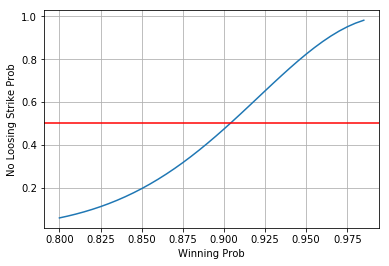

With at least 90.5% of winning percentage
then the Worriors will have the probability of 0.508555 for not lose 2 games in a row at anytime during the 82-games season.  


In [506]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


winningProb = np.arange(0.8,0.99,0.005)

plt.plot(winningProb, noLoosingStrikeProb)
plt.xlabel("Winning Prob")
plt.ylabel("No Loosing Strike Prob")
plt.axhline(y=0.5, label='0.5', color='r', linestyle='-', )
plt.grid()
plt.show()



print ("With at least %s of winning percentage" %  "{:.1%}".format(result))
print ("then the Worriors will have the probability of %f for not lose 2 games in a row at anytime during the 82-games season.  " % getNoLoosingStrikeProb(result))

Beside Negative Binomial Distributions, the other approaches can be using naive bayes since the winning percentage was assummed to be independent 